In [ ]:
import os

if not os.getcwd().endswith("src"):
    %cd ..
%pwd

/home/xqz-u/master/FACT/FACT/src


'/home/xqz-u/master/FACT/FACT/src'

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

import config
import plot
import sources_of_envy

/home/xqz-u/py_envs/FACT/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/xqz-u/py_envs/FACT/lib/python3.8/site-packages/implicit/gpu/__init__.py:13: UserWarning: CUDA extension is built, but disabling GPU support because of 'Cuda Error: CUDA driver version is insufficient for CUDA runtime version (/project/./implicit/gpu/utils.h:71)'
  warnings.warn(


In [ ]:
metrics = sources_of_envy.do_envy_from_mispecification()

/home/xqz-u/master/FACT/FACT/src/utils.py:68: RuntimeWarning: invalid value encountered in divide
  rescaled = np.squeeze((a - min_) / (a.max(axis=1)[:, None] - min_))


In [ ]:
df = pd.concat(
    [pd.DataFrame(vals).assign(dataset=dataset) for dataset, vals in metrics.items()]
)
df

,mean_envy,prop_eps_envy,dataset
64,0.000172,0.0,lastfm
256,0.000122,0.0,lastfm
4,0.000399,0.0,lastfm
8,0.000373,0.0,lastfm
128,0.000154,0.0,lastfm
32,0.000194,0.0,lastfm
2,0.000361,0.0,lastfm
1,0.000261,0.0,lastfm
16,0.000286,0.0,lastfm
64,0.000365,0.0,movielens


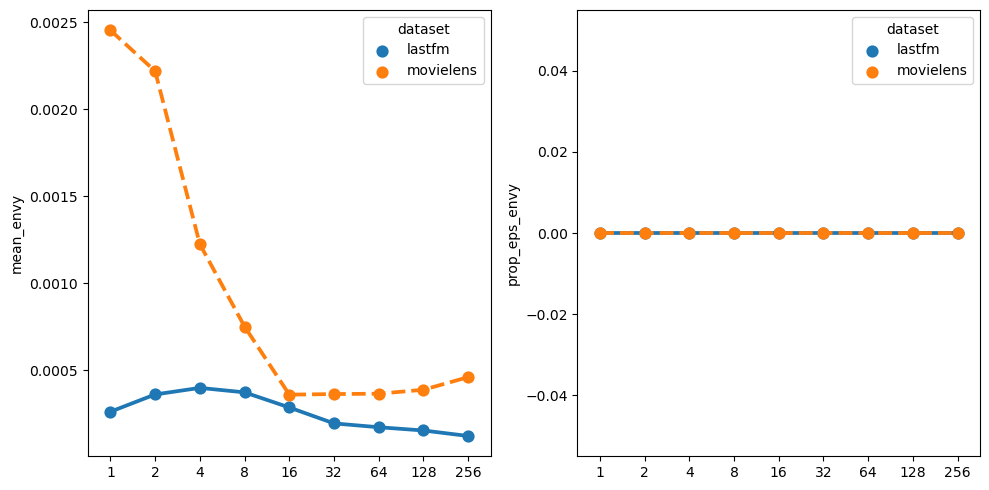

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.pointplot(data=df, x=df.index, y="mean_envy", hue="dataset", linestyles=["-", "--"], ax=axes[0])
#sns.lineplot(data=df, x=df.index, y="mean_envy", hue="dataset", ax=axes[0])
#axes[0].set_xlim(-10, 120)
#sns.lineplot(data=df, x=df.index, y="prop_eps_envy", hue="dataset", ax=axes[1])
#axes[1].set_xlim(-10, 120)
sns.pointplot(data=df, x=df.index, y="prop_eps_envy", hue="dataset", linestyles=["-", "--"], ax=axes[1])
plt.tight_layout()